<a href="https://colab.research.google.com/github/mxdara/PCA_Occupancy/blob/main/House_Occupancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Detection of Room occupancy**

**Importing Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Data Overview**

The "Occupancy Data Set," sourced from the UCI Machine Learning Repository, is utilized for both Principle Component Analysis (PCA) and classification tasks. This dataset provides insights into factors influencing occupancy status.

After transforming the original date feature into a time-of-day feature, the dataset comprises 2665 entries with six attributes and a single classification column. In this context, a value of **0 indicates "None Present"**, while **1 signifies "Occupants Present"**.

The attributes, all numerical, include:

1. Time of day
2. Temperature
3. Light
4. Humidity
5. CO2 Measurement
6. Humidity Ratio
7. Occupancy (Target Label)


The original dataset can be found on below link:


https://archive.ics.uci.edu/dataset/357/occupancy+detection


https://github.com/LuisM78/Occupancy-detection-data

In [4]:
import io
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/mxdara/PCA_Occupancy/main/Occupancy.csv')
df.head(25)


Time_of_day  Temperature  Humidity       Light         CO2  HumidityRatio  \
0             2      23.7000   26.2720  585.200000  749.200000       0.004764   
1             2      23.7180   26.2900  578.400000  760.400000       0.004773   
2             2      23.7300   26.2300  572.666667  769.666667       0.004765   
3             2      23.7225   26.1250  493.750000  774.750000       0.004744   
4             2      23.7540   26.2000  488.600000  779.000000       0.004767   
5             2      23.7600   26.2600  568.666667  790.000000       0.004779   
6             2      23.7300   26.2900  536.333333  798.000000       0.004776   
7             2      23.7540   26.2900  509.000000  797.000000       0.004783   
8             2      23.7540   26.3500  476.000000  803.200000       0.004794   
9             2      23.7360   26.3900  510.000000  809.000000       0.004796   
10            2      23.7450   26.4450  481.500000  815.250000       0.004809   
11            2      23.7000   26.5600  481.800000  824.000000       0.004817   
12            2      23.7000   26.6000  475.250000  832.000000       0.004824   
13            2      23.7000   26.7000  469.000000  845.333333       0.004842   
14            2      23.7000   26.7740  464.000000  852.400000       0.004856   
15            2      23.7000   26.8900  464.000000  861.000000       0.004877   
16            2      23.7000   26.9725  455.000000  880.000000       0.004892   
17            2      23.6000   26.8900  454.000000  891.000000       0.004848   
18            2      23.6400   26.9760  458.000000  897.600000       0.004875   
19            2      23.6500   27.0500  464.000000  900.500000       0.004891   
20            2      23.6400   27.1000  473.000000  908.800000       0.004898   
21            2      23.6000   27.1600  464.000000  918.000000       0.004897   
22            2      23.6000   27.2360  498.400000  925.200000       0.004910   
23            2      23.6000   27.2900  530.200000  929.400000       0.004920   
24            2      23.6000   27.3300  533.600000  936.400000       0.004928   

    Occupancy  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  
10          1  
11          1  
12          1  
13          1  
14          1  
15          1  
16          1  
17          1  
18          1  
19          1  
20          1  
21          1  
22          1  
23          1  
24          1

In [5]:
len(df.index)

2665

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time_of_day    2665 non-null   int64  
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 145.9 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  82


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

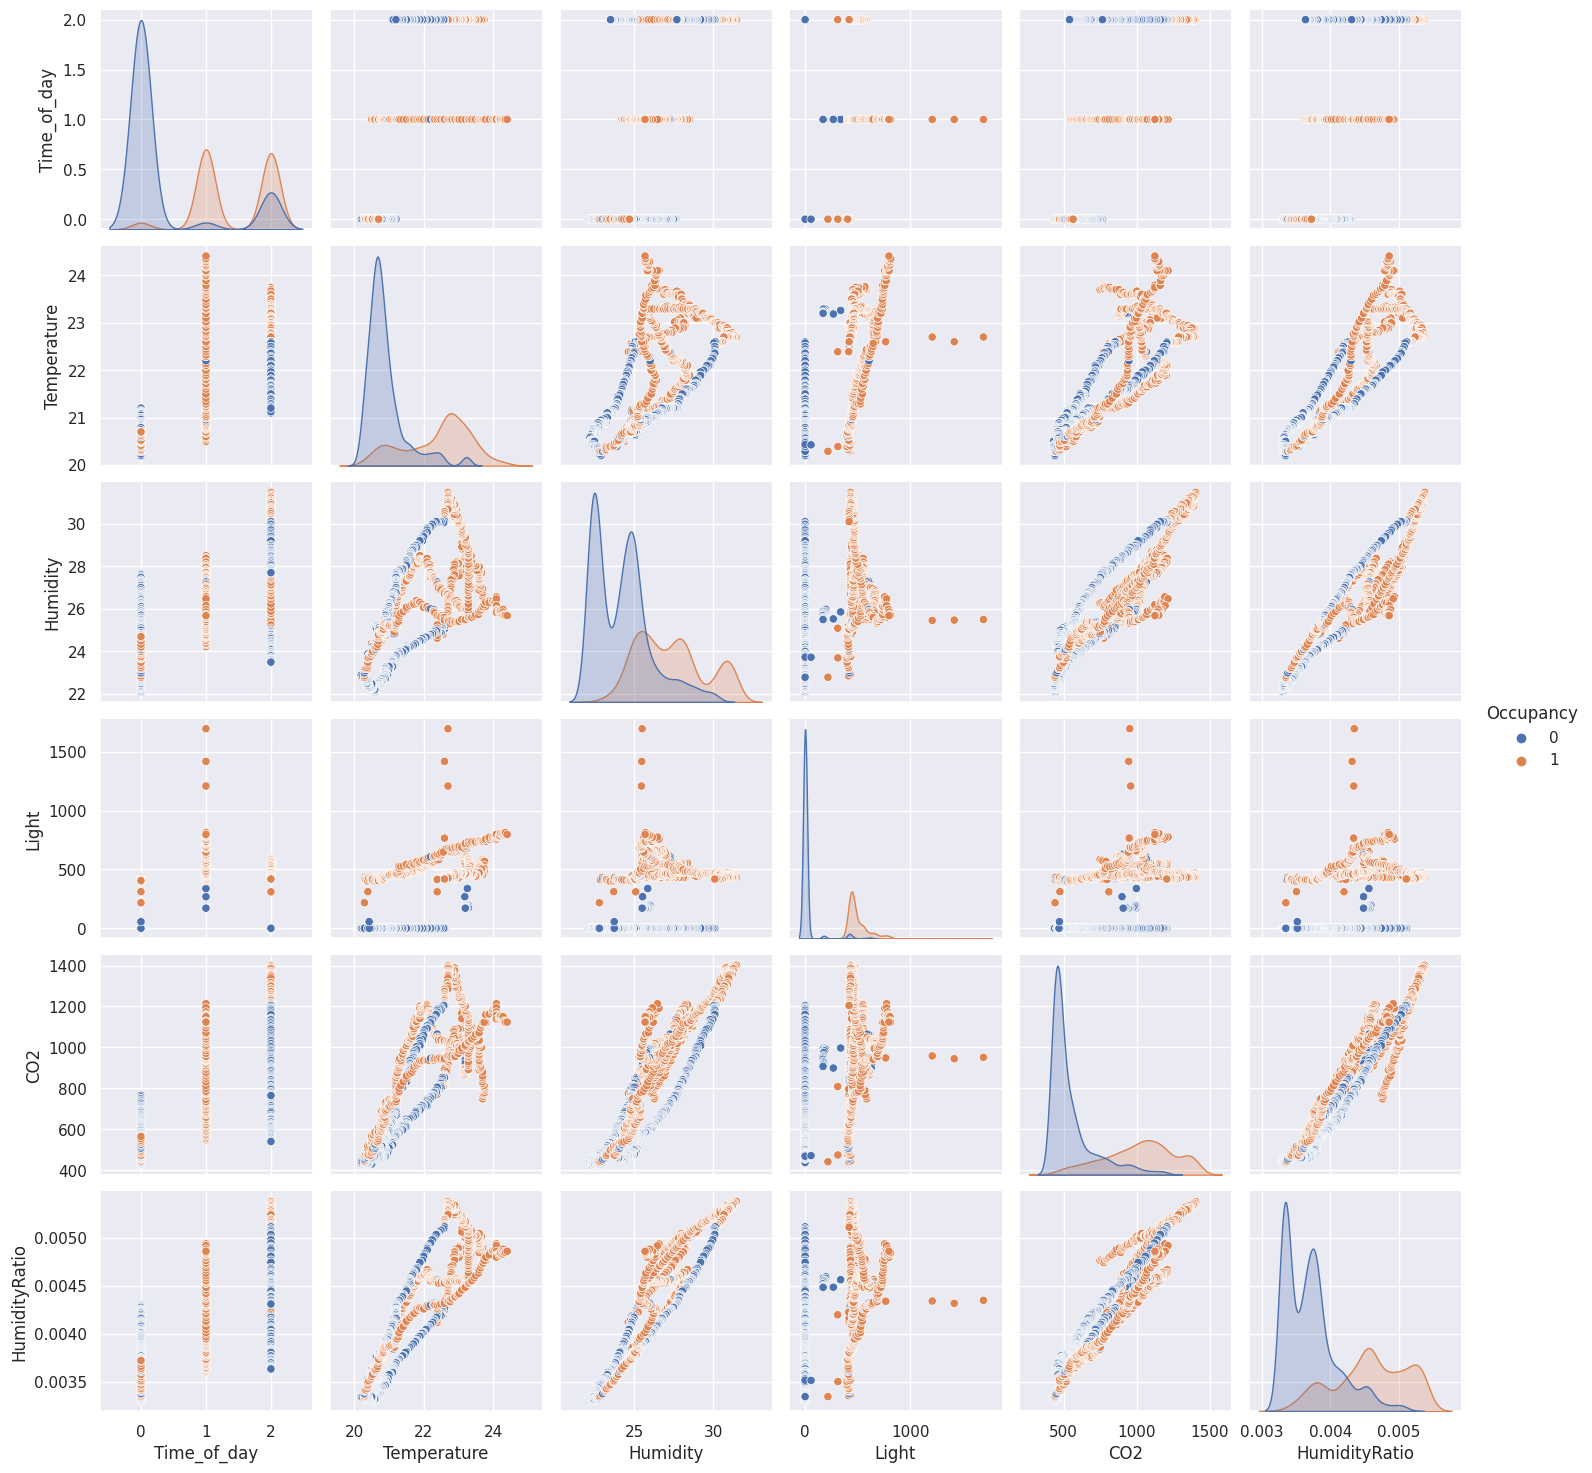

In [9]:
sns.pairplot(df, hue='Occupancy')
plt.show()

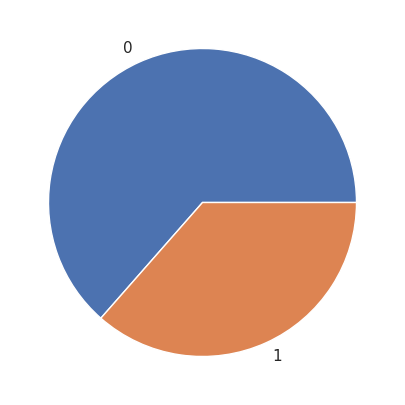

In [10]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['Occupancy'])
X.head(10)

Time_of_day  Temperature  Humidity       Light         CO2  HumidityRatio
0            2      23.7000    26.272  585.200000  749.200000       0.004764
1            2      23.7180    26.290  578.400000  760.400000       0.004773
2            2      23.7300    26.230  572.666667  769.666667       0.004765
3            2      23.7225    26.125  493.750000  774.750000       0.004744
4            2      23.7540    26.200  488.600000  779.000000       0.004767
5            2      23.7600    26.260  568.666667  790.000000       0.004779
6            2      23.7300    26.290  536.333333  798.000000       0.004776
7            2      23.7540    26.290  509.000000  797.000000       0.004783
8            2      23.7540    26.350  476.000000  803.200000       0.004794
9            2      23.7360    26.390  510.000000  809.000000       0.004796

In [12]:
X.describe().transpose()

count        mean         std         min         25%  \
Time_of_day    2665.0    0.723077    0.852842    0.000000    0.000000   
Temperature    2665.0   21.433876    1.028024   20.200000   20.650000   
Humidity       2665.0   25.353937    2.436842   22.100000   23.260000   
Light          2665.0  193.227556  250.210906    0.000000    0.000000   
CO2            2665.0  717.906470  292.681718  427.500000  466.000000   
HumidityRatio  2665.0    0.004027    0.000611    0.003303    0.003529   

                      50%         75%          max  
Time_of_day      0.000000    2.000000     2.000000  
Temperature     20.890000   22.356667    24.408333  
Humidity        25.000000   26.856667    31.472500  
Light            0.000000  442.500000  1697.250000  
CO2            580.500000  956.333333  1402.250000  
HumidityRatio    0.003815    0.004532     0.005378

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Time_of_day  Temperature  Humidity     Light       CO2  HumidityRatio
0     1.497538     2.204762  0.376814  1.566862  0.106940       1.207540
1     1.497538     2.222275  0.384202  1.539680  0.145214       1.221461
2     1.497538     2.233950  0.359575  1.516762  0.176881       1.209162
3     1.497538     2.226653  0.316478  1.201302  0.194253       1.174139
4     1.497538     2.257300  0.347262  1.180715  0.208776       1.211522
5     1.497538     2.263138  0.371888  1.500772  0.246367       1.232389
6     1.497538     2.233950  0.384202  1.371524  0.273705       1.227153
7     1.497538     2.257300  0.384202  1.262262  0.270288       1.238551
8     1.497538     2.257300  0.408828  1.130348  0.291475       1.256571
9     1.497538     2.239788  0.425246  1.266259  0.311296       1.260002

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Time_of_day    2665.0 -2.239609e-16  1.000188 -0.848003 -0.848003 -0.848003   
Temperature    2665.0  3.114124e-15  1.000188 -1.200466 -0.762651 -0.529149   
Humidity       2665.0  9.385030e-16  1.000188 -1.335559 -0.859444 -0.145271   
Light          2665.0  1.386425e-16  1.000188 -0.772404 -0.772404 -0.772404   
CO2            2665.0 -3.199442e-16  1.000188 -0.992412 -0.860846 -0.469562   
HumidityRatio  2665.0  1.493073e-16  1.000188 -1.185497 -0.815008 -0.347182   

                    75%       max  
Time_of_day    1.497538  1.497538  
Temperature    0.897803  2.893916  
Humidity       0.616787  2.511328  
Light          0.996436  6.012147  
CO2            0.814781  2.338622  
HumidityRatio  0.826469  2.212680

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

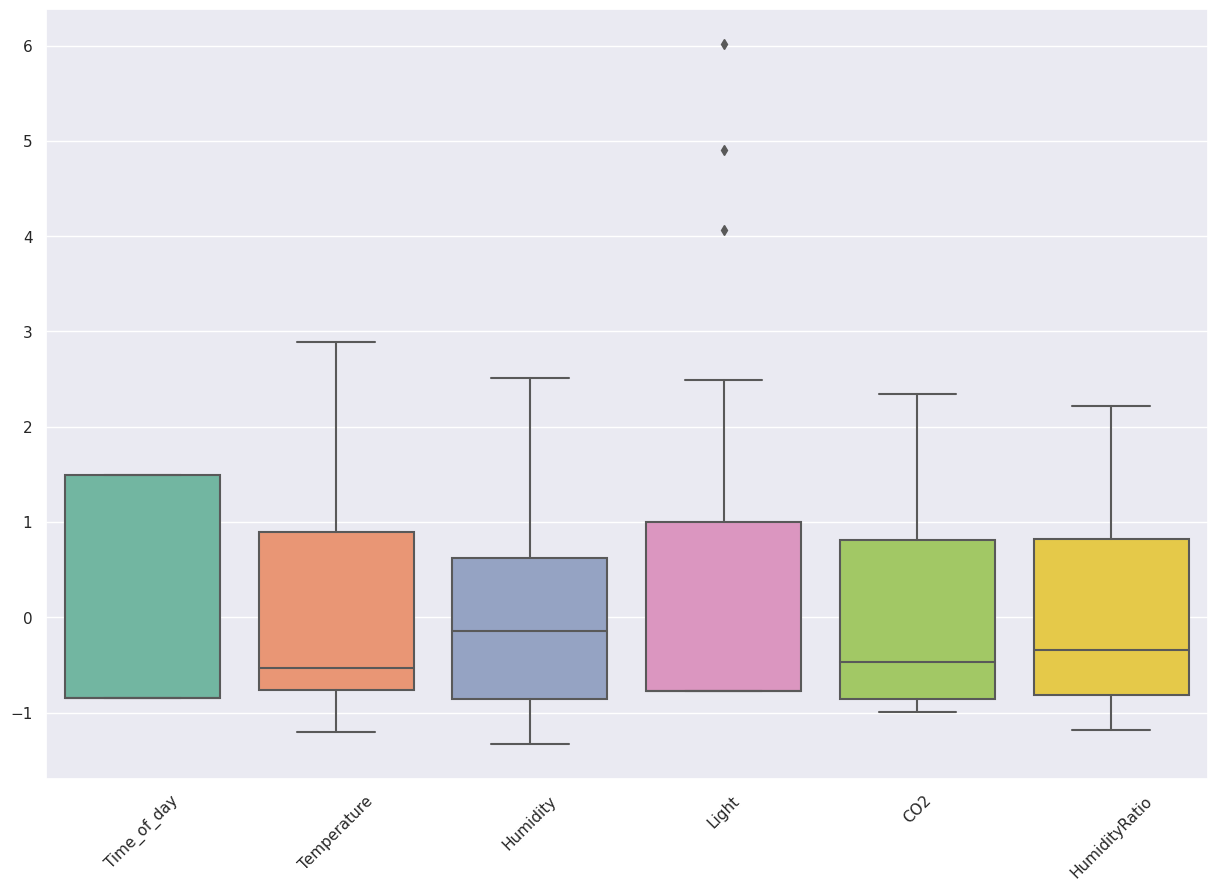

In [16]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


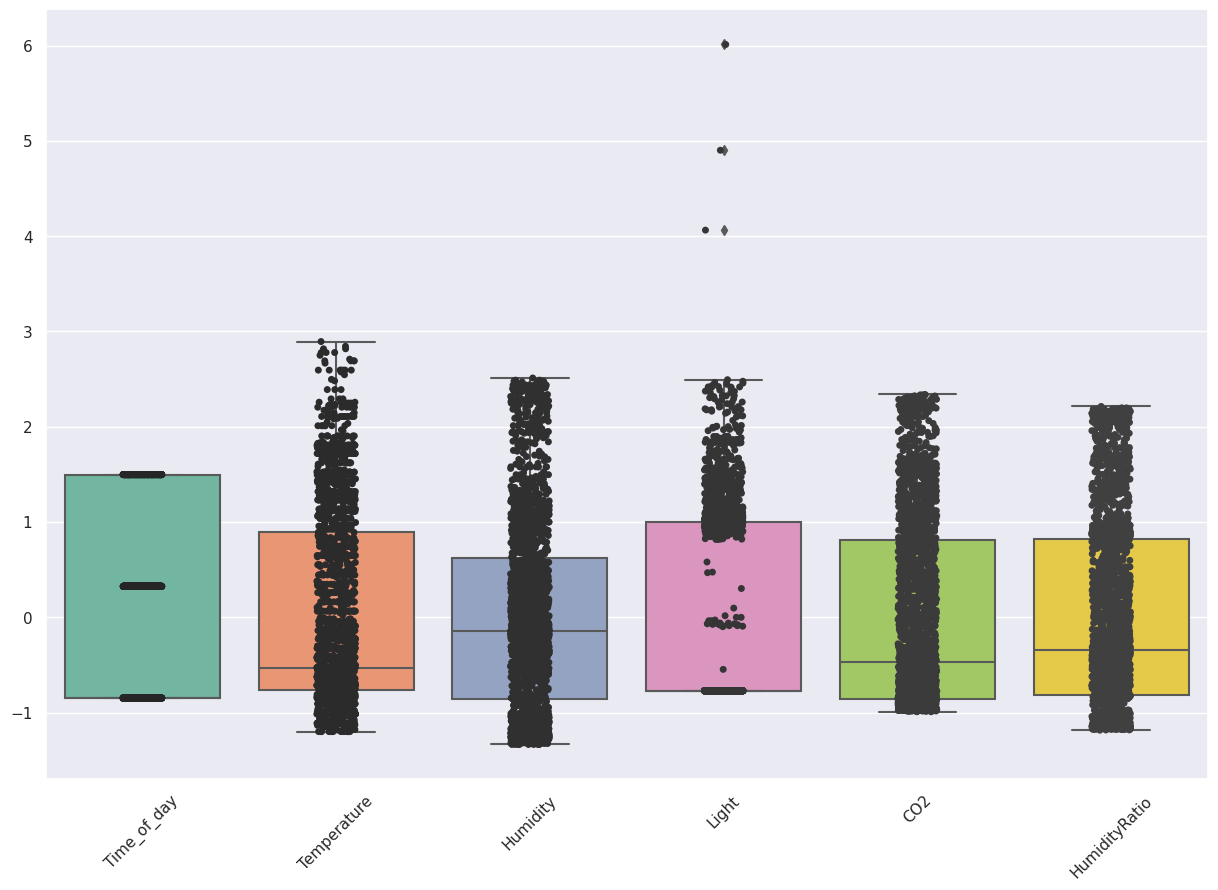

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

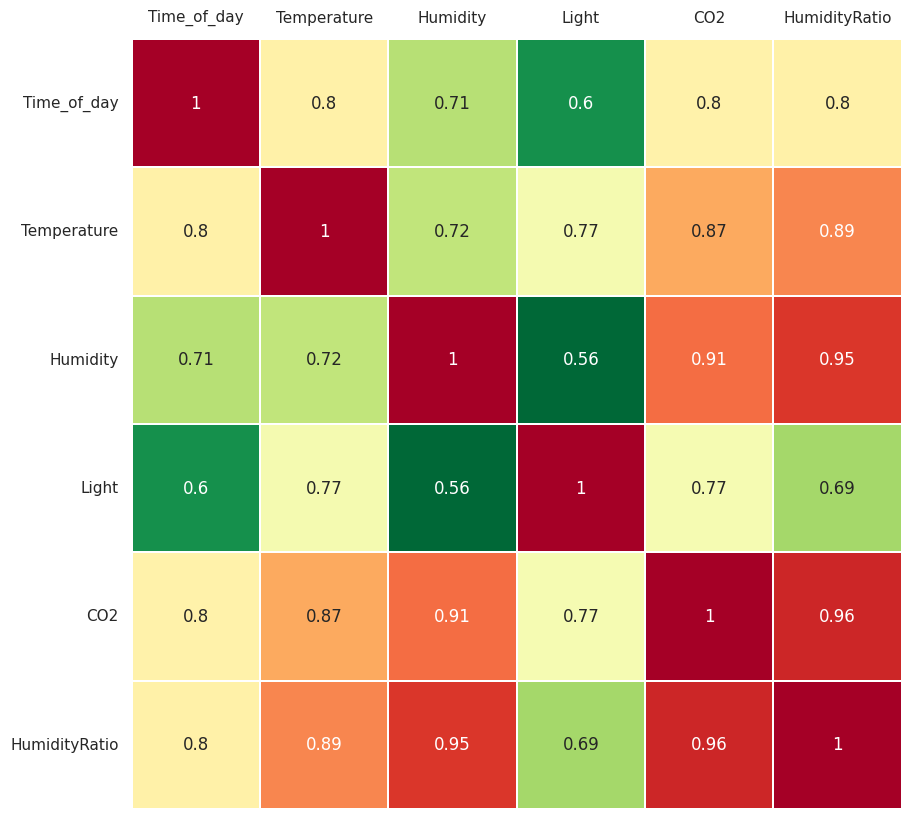

In [18]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

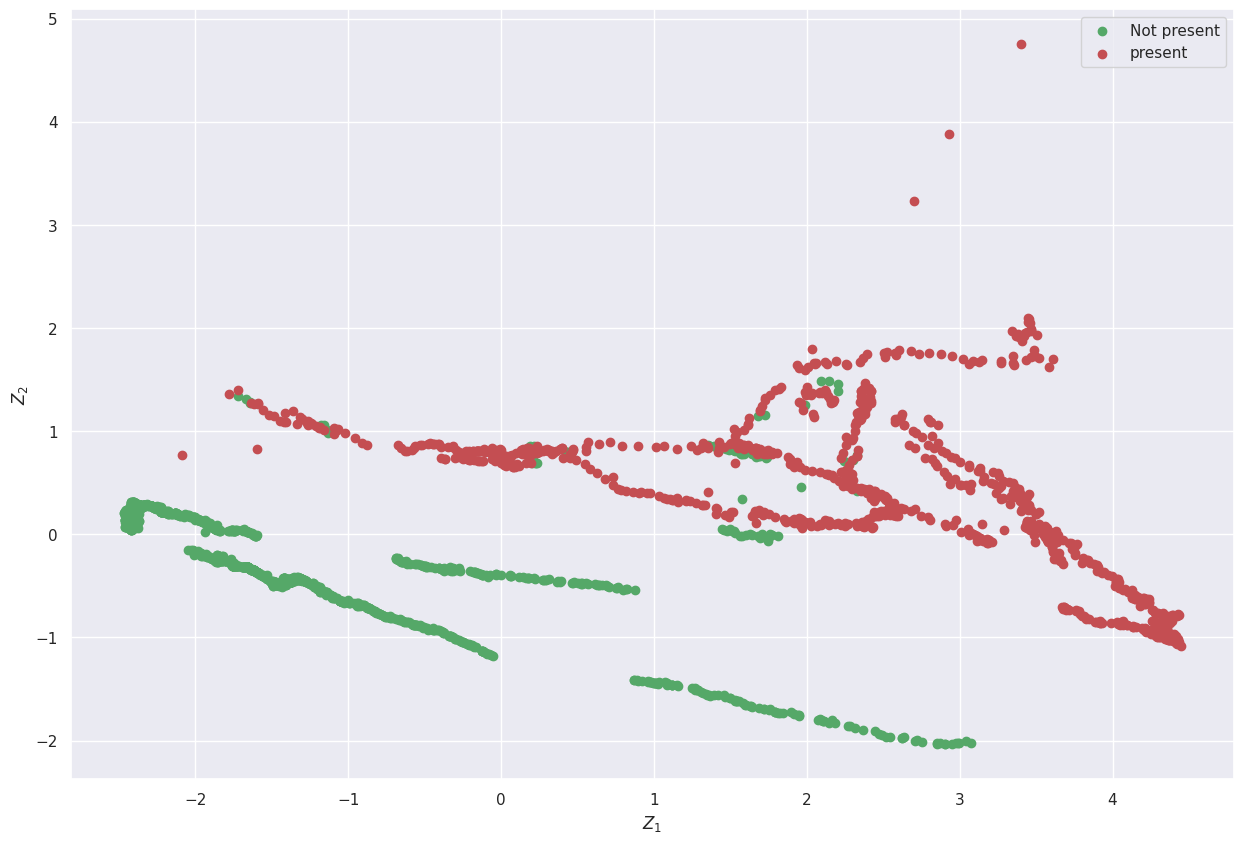

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Notpresent= np.where(y == 0)
idx_present = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Notpresent,0], Z[idx_Notpresent,1], c='g', label='Not present')
plt.scatter(Z[idx_present,0], Z[idx_present,1], c='r', label='present')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

In [20]:
var = ['Time of Day','Temperature','Humidity','Light','CO2','Humidity Ratio']

array([[ 0.38785557, -0.09559396,  0.81116149, -0.42176375,  0.06711667,
         0.00758803],
       [ 0.41652299,  0.23221546,  0.22686499,  0.77227821,  0.07394051,
        -0.34530569],
       [ 0.4023443 , -0.51542457, -0.38575661, -0.20429445,  0.37476028,
        -0.49139285],
       [ 0.35874701,  0.78286927, -0.28490921, -0.36081009,  0.21662829,
         0.01145834],
       [ 0.4390713 , -0.07281937, -0.19372782, -0.09121852, -0.86874545,
        -0.0366577 ],
       [ 0.43899054, -0.23040907, -0.15178084,  0.21321524,  0.21894388,
         0.79860152]])

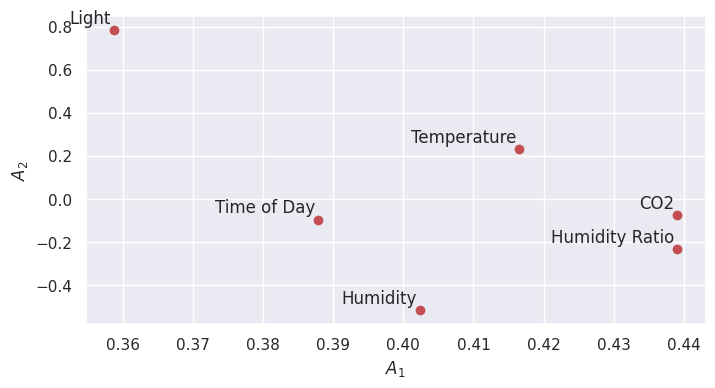

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))



plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')


for label, x, y in zip(var, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


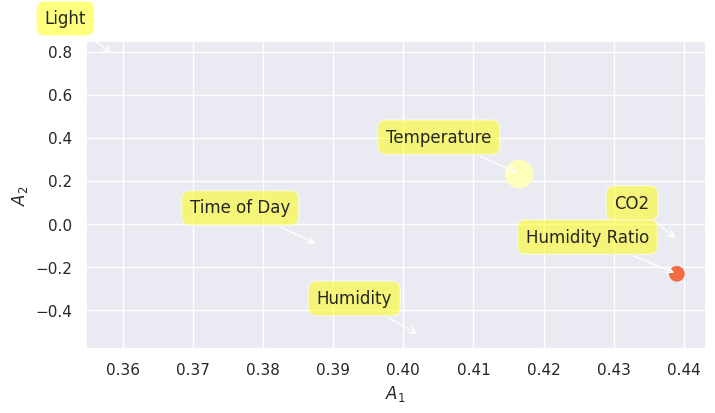

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(var,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.96163873e+00, 5.09439807e-01, 3.35836048e-01, 1.58496616e-01,
       3.60762619e-02, 7.64794326e-04])

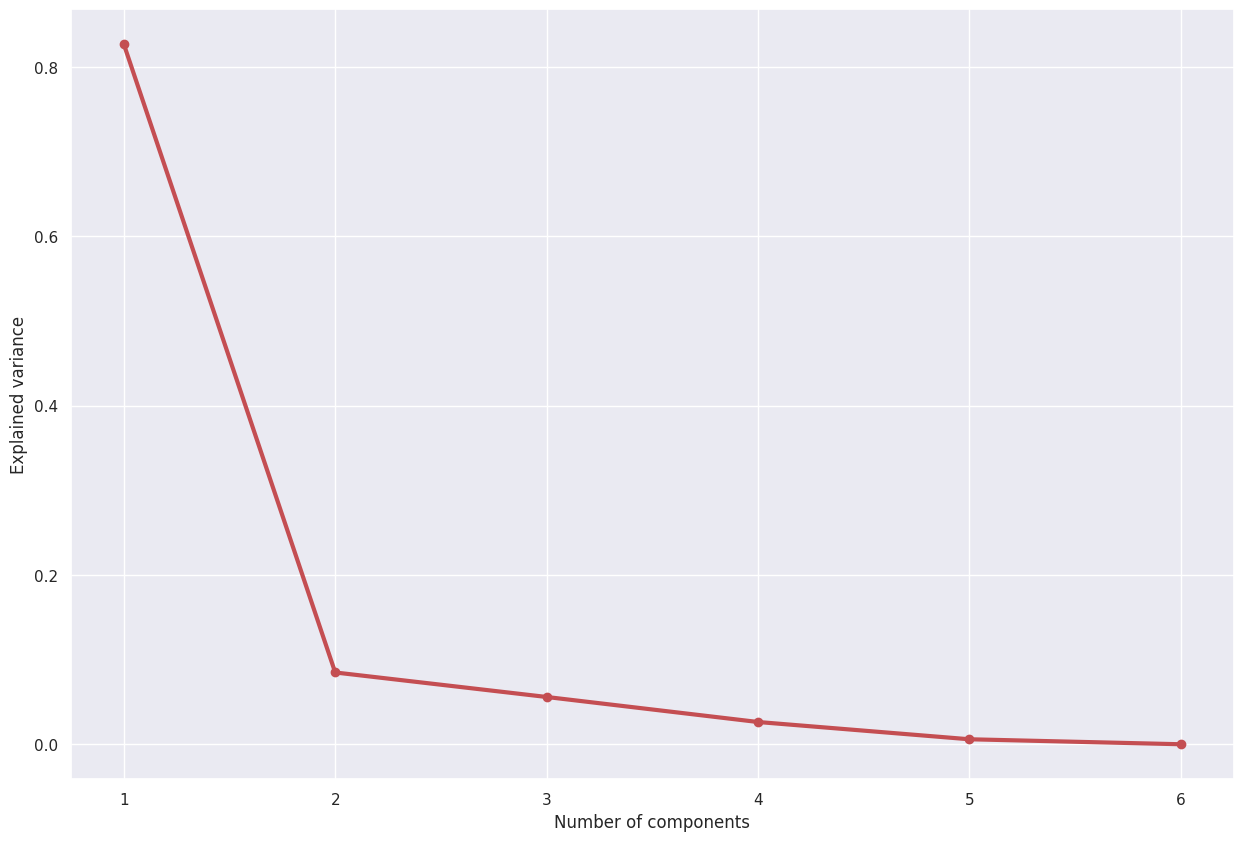

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

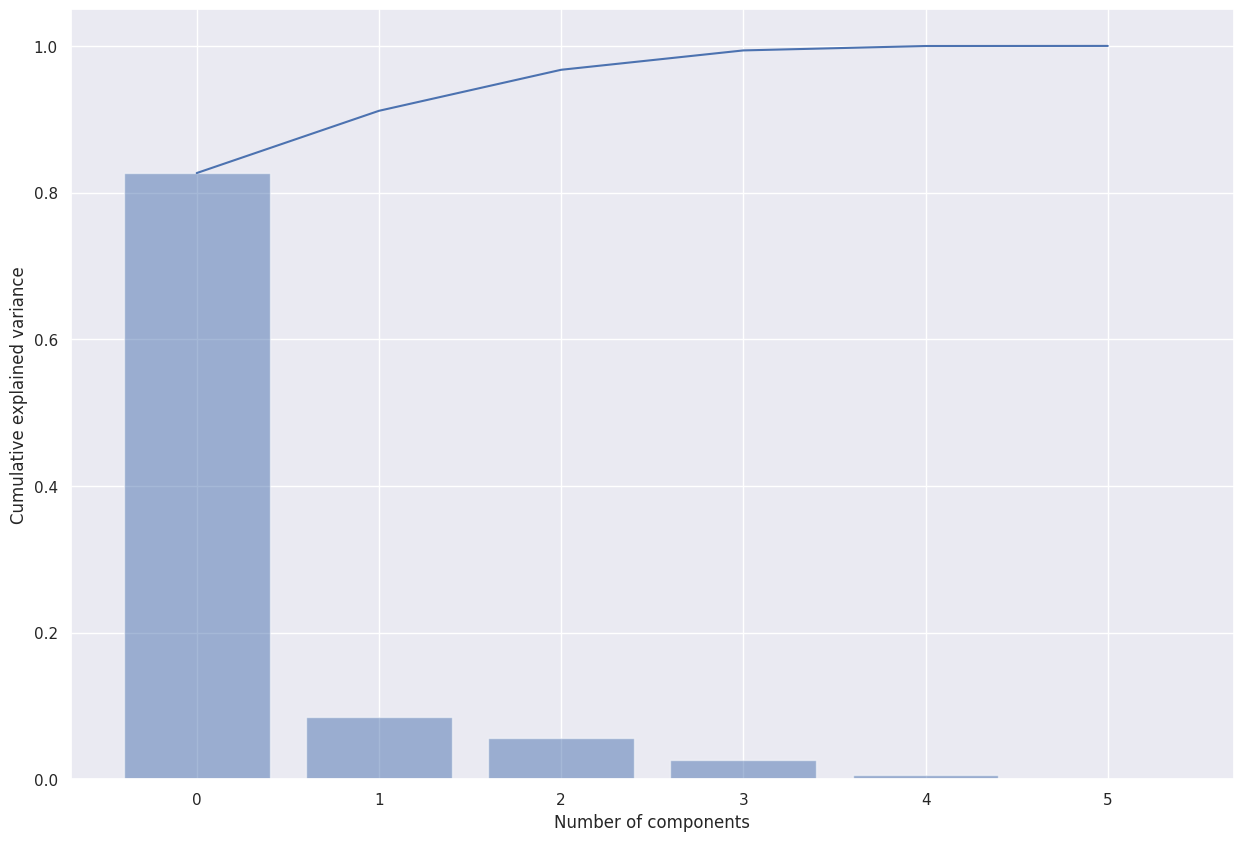

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([1.11523802, 1.08822213, 1.08621221, ..., 2.09346518, 2.08472499,
       2.04868941])

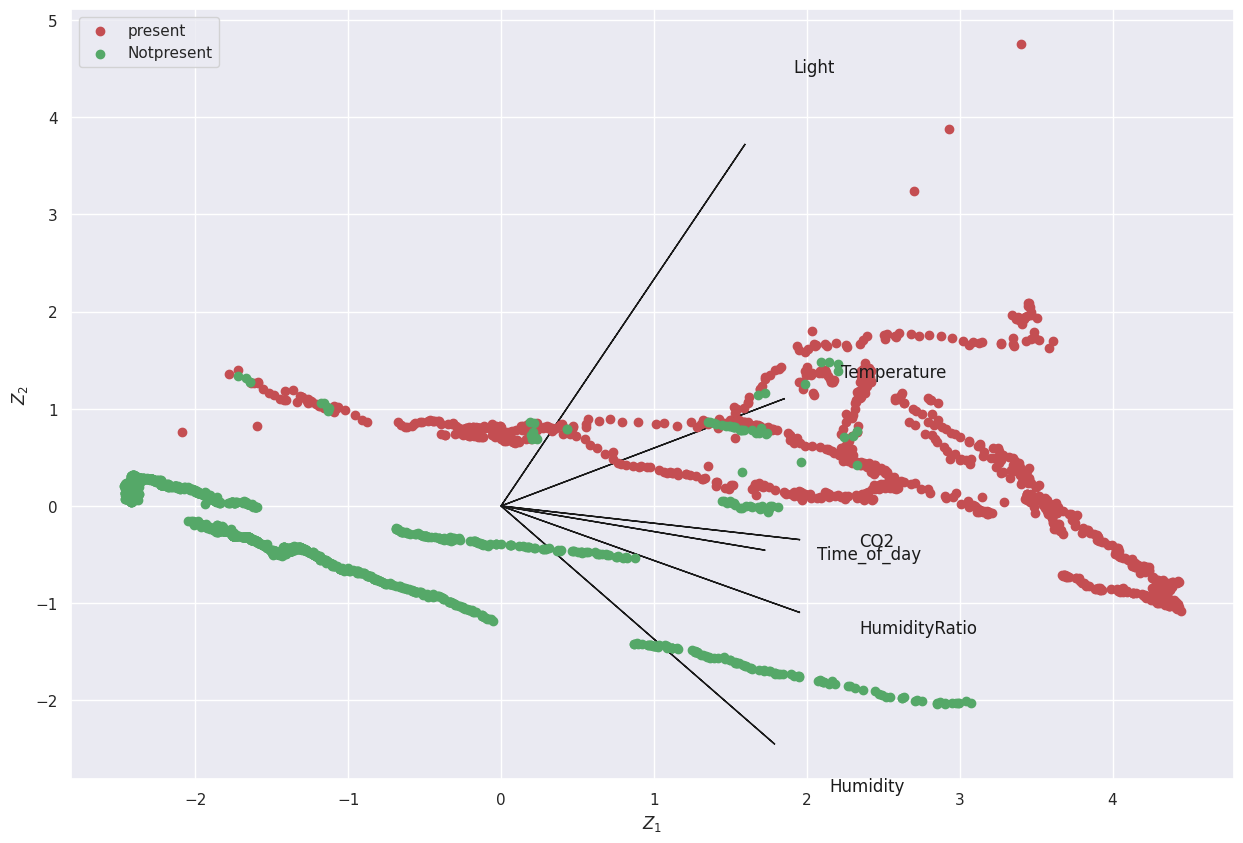

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_present,0], Z[idx_present,1], c='r', label='present')
plt.scatter(Z[idx_Notpresent,0], Z[idx_Notpresent,1], c='g', label='Notpresent')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [26]:
!pip install pca

In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3
0     2.789932  1.115238  0.919158
1     2.813363  1.088222  0.918498
2     2.808601  1.086212  0.932908
3     2.667304  0.866572  1.039705
4     2.707857  0.832034  1.032161
...        ...       ...       ...
2660  3.447643  2.054587 -0.346749
2661  3.454108  2.059892 -0.336337
2662  3.448472  2.093465 -0.334888
2663  3.454951  2.084725 -0.324532
2664  3.461227  2.048689 -0.296700

[2665 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.38%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (8.48% expl.var)'>)

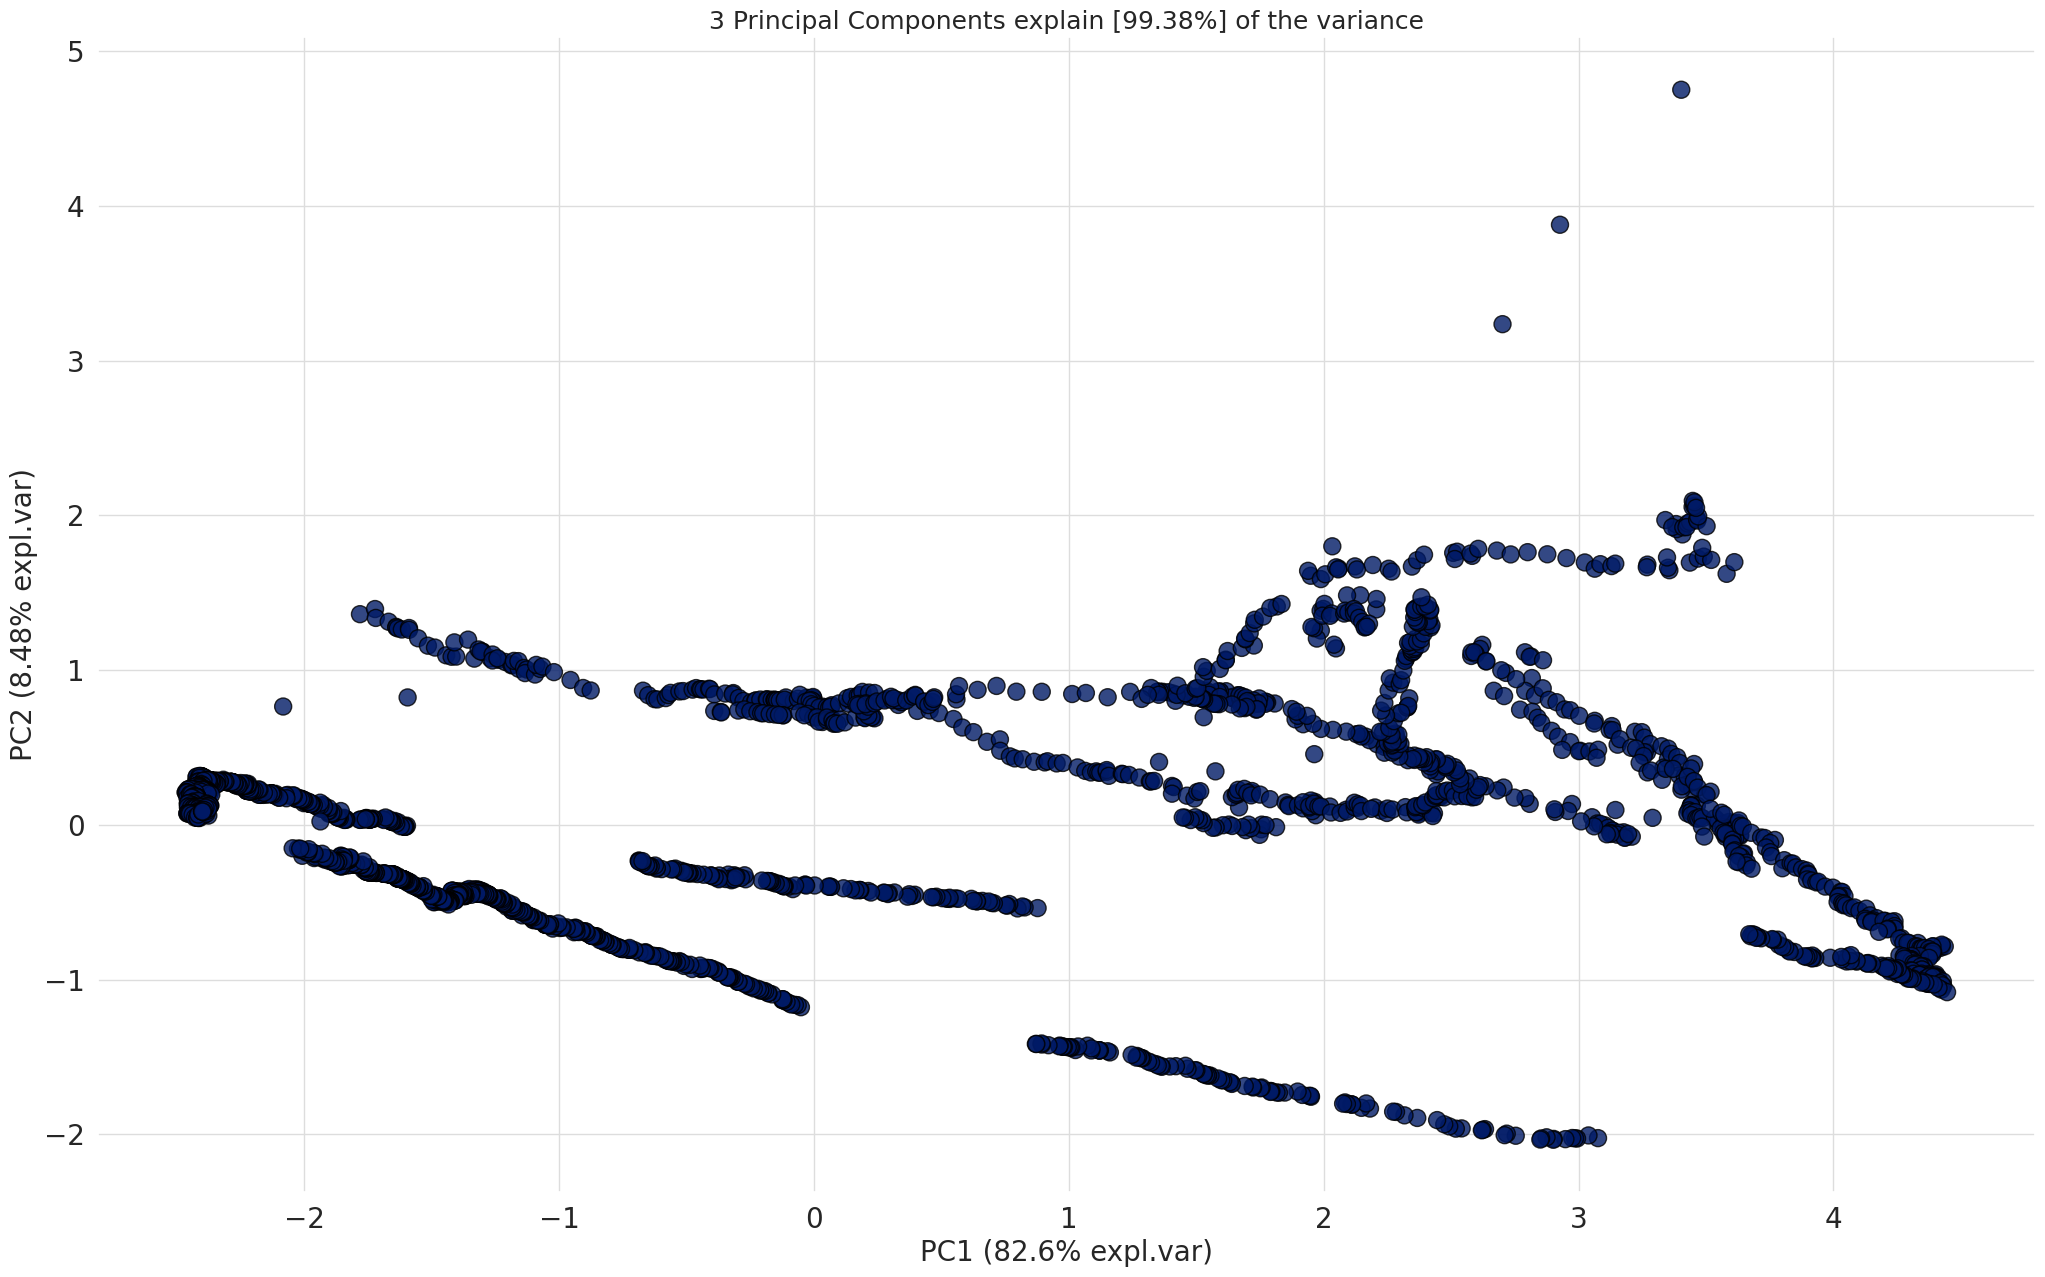

In [29]:
model.scatter(label=None, legend=True)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3
Time_of_day    0.387856 -0.095594  0.811161
Temperature    0.416523  0.232215  0.226865
Humidity       0.402344 -0.515425 -0.385757
Light          0.358747  0.782869 -0.284909
CO2            0.439071 -0.072819 -0.193728
HumidityRatio  0.438991 -0.230409 -0.151781

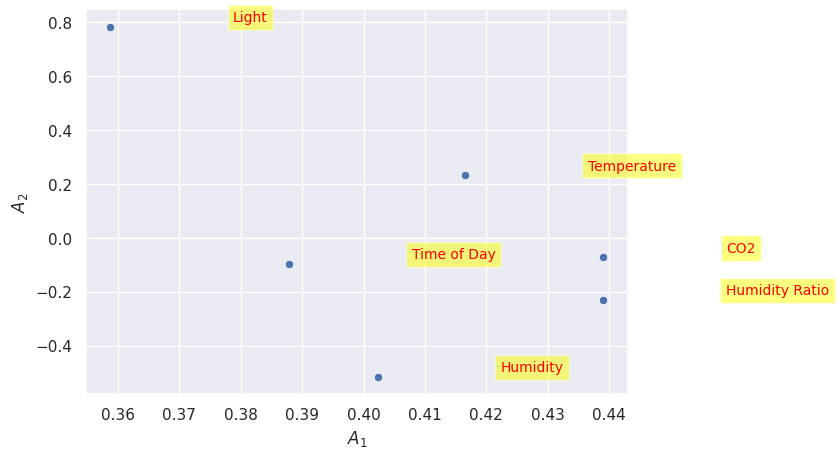

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=var[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

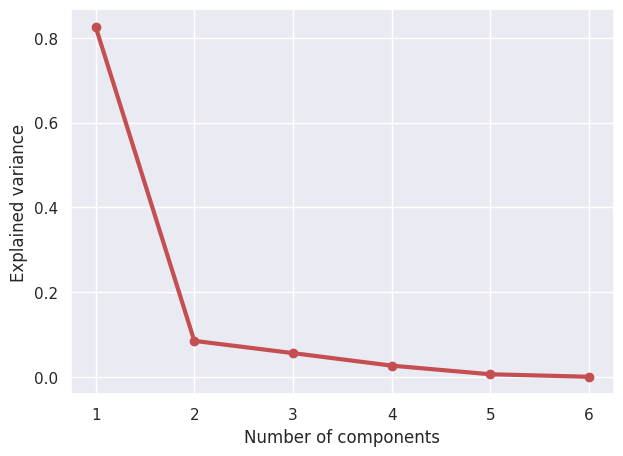

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

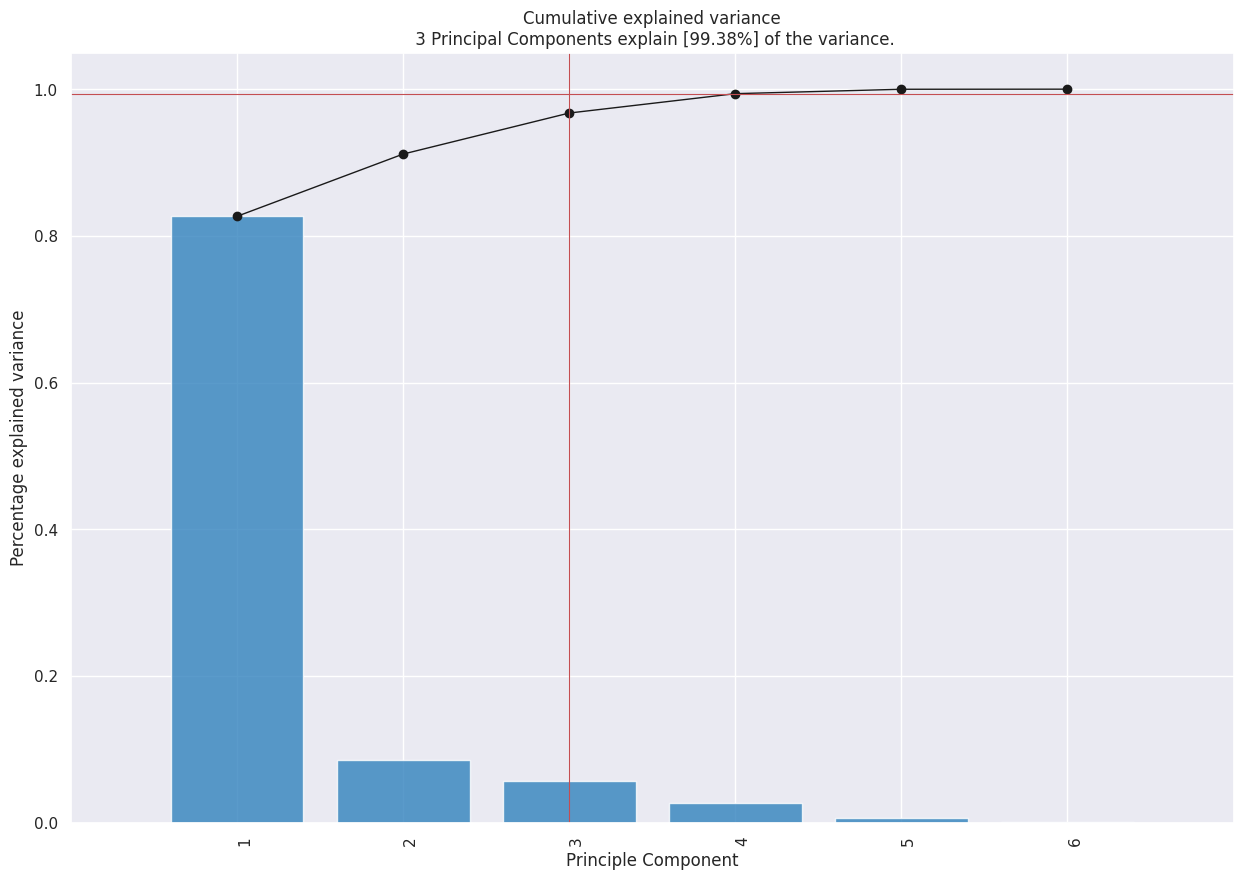

In [33]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.38%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (8.48% expl.var)'>)

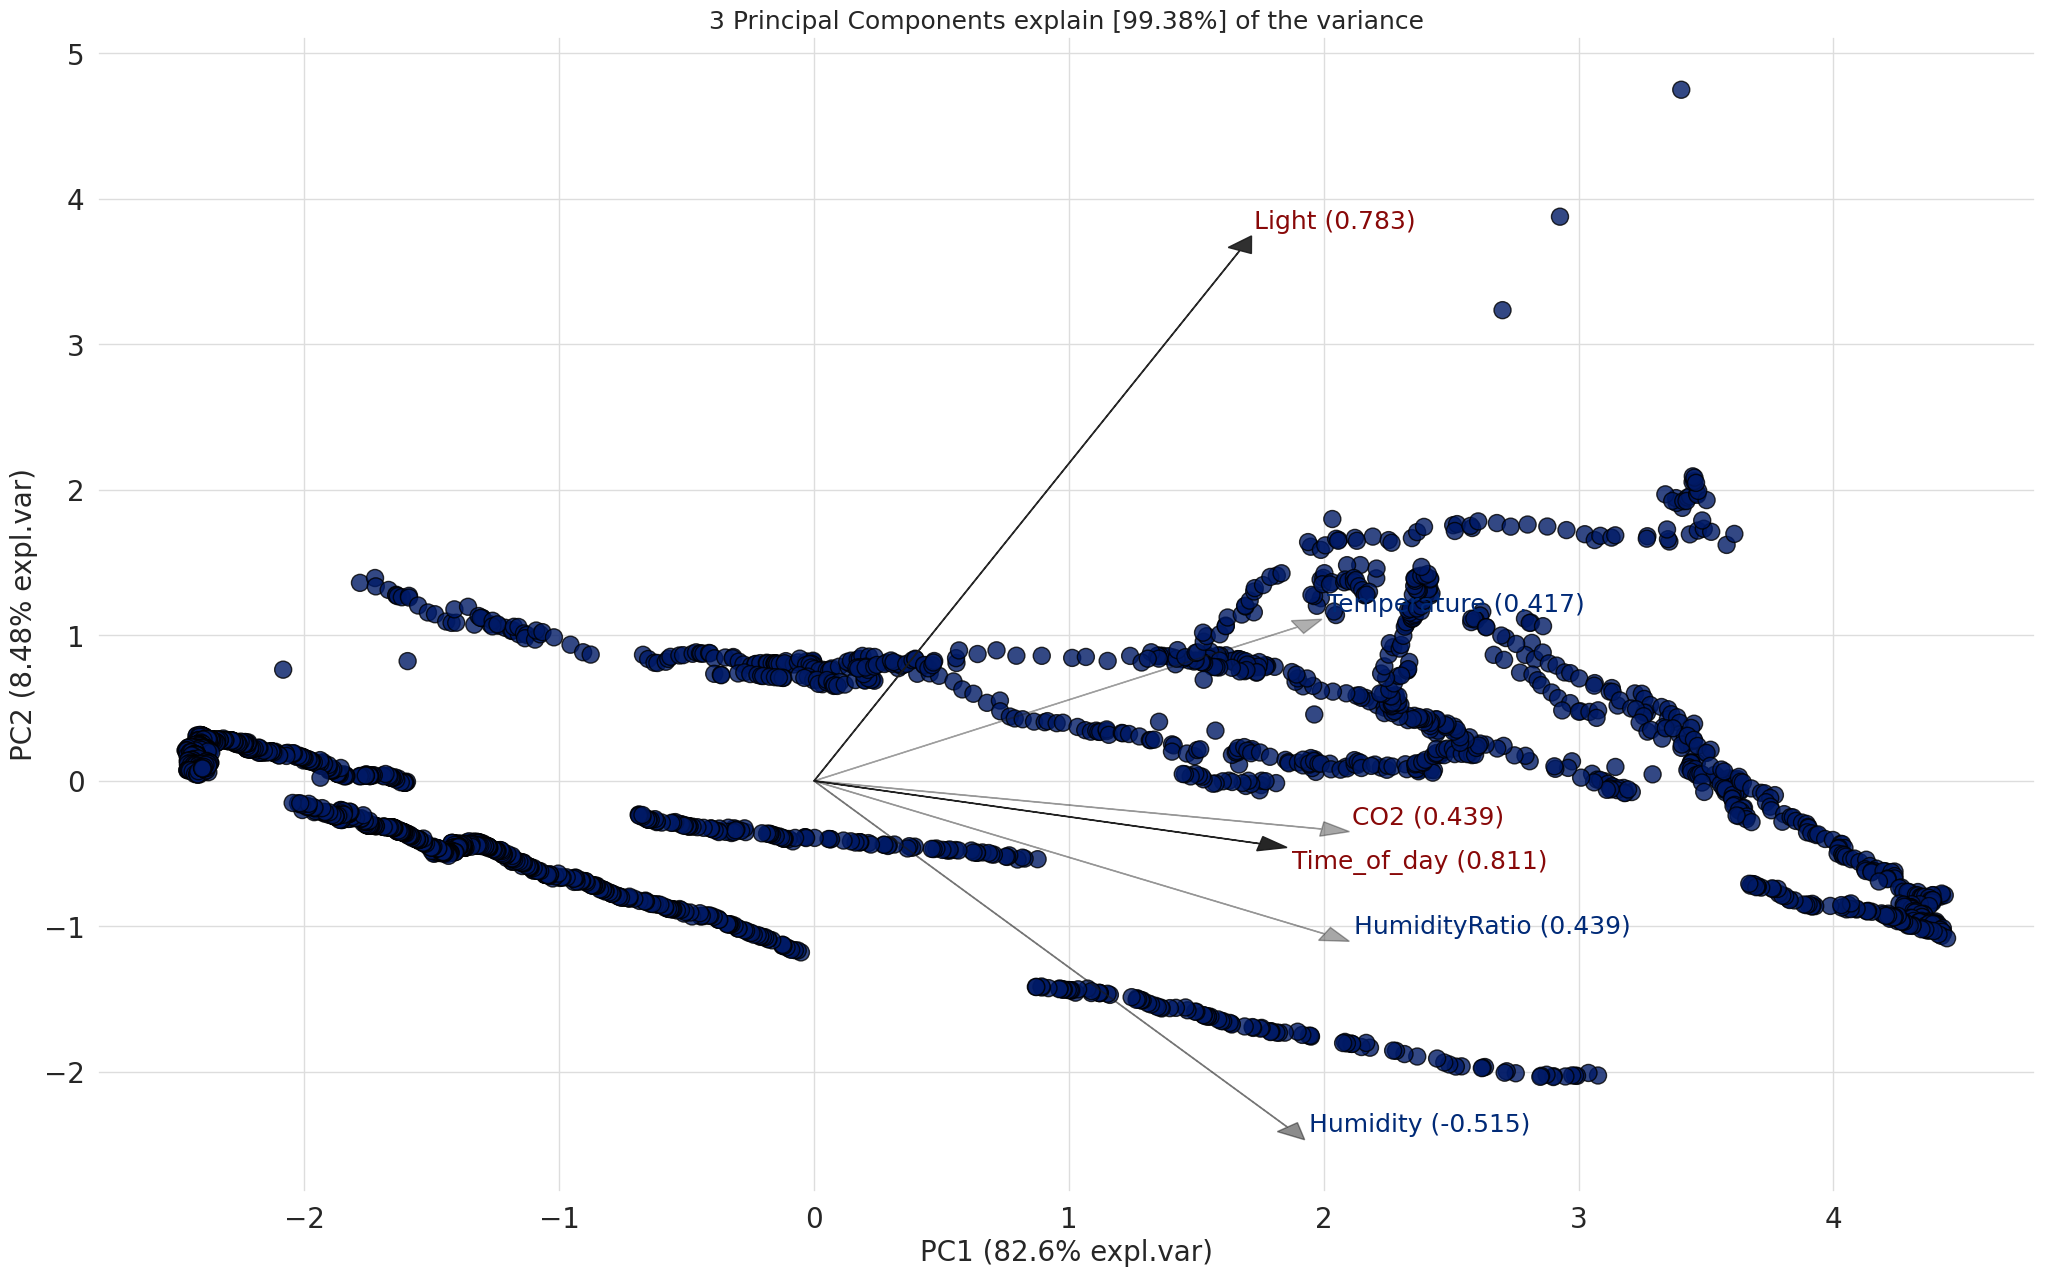

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '3 Principal Components explain [99.38%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (8.48% expl.var)', zlabel='PC3 (5.59% expl.var)'>)

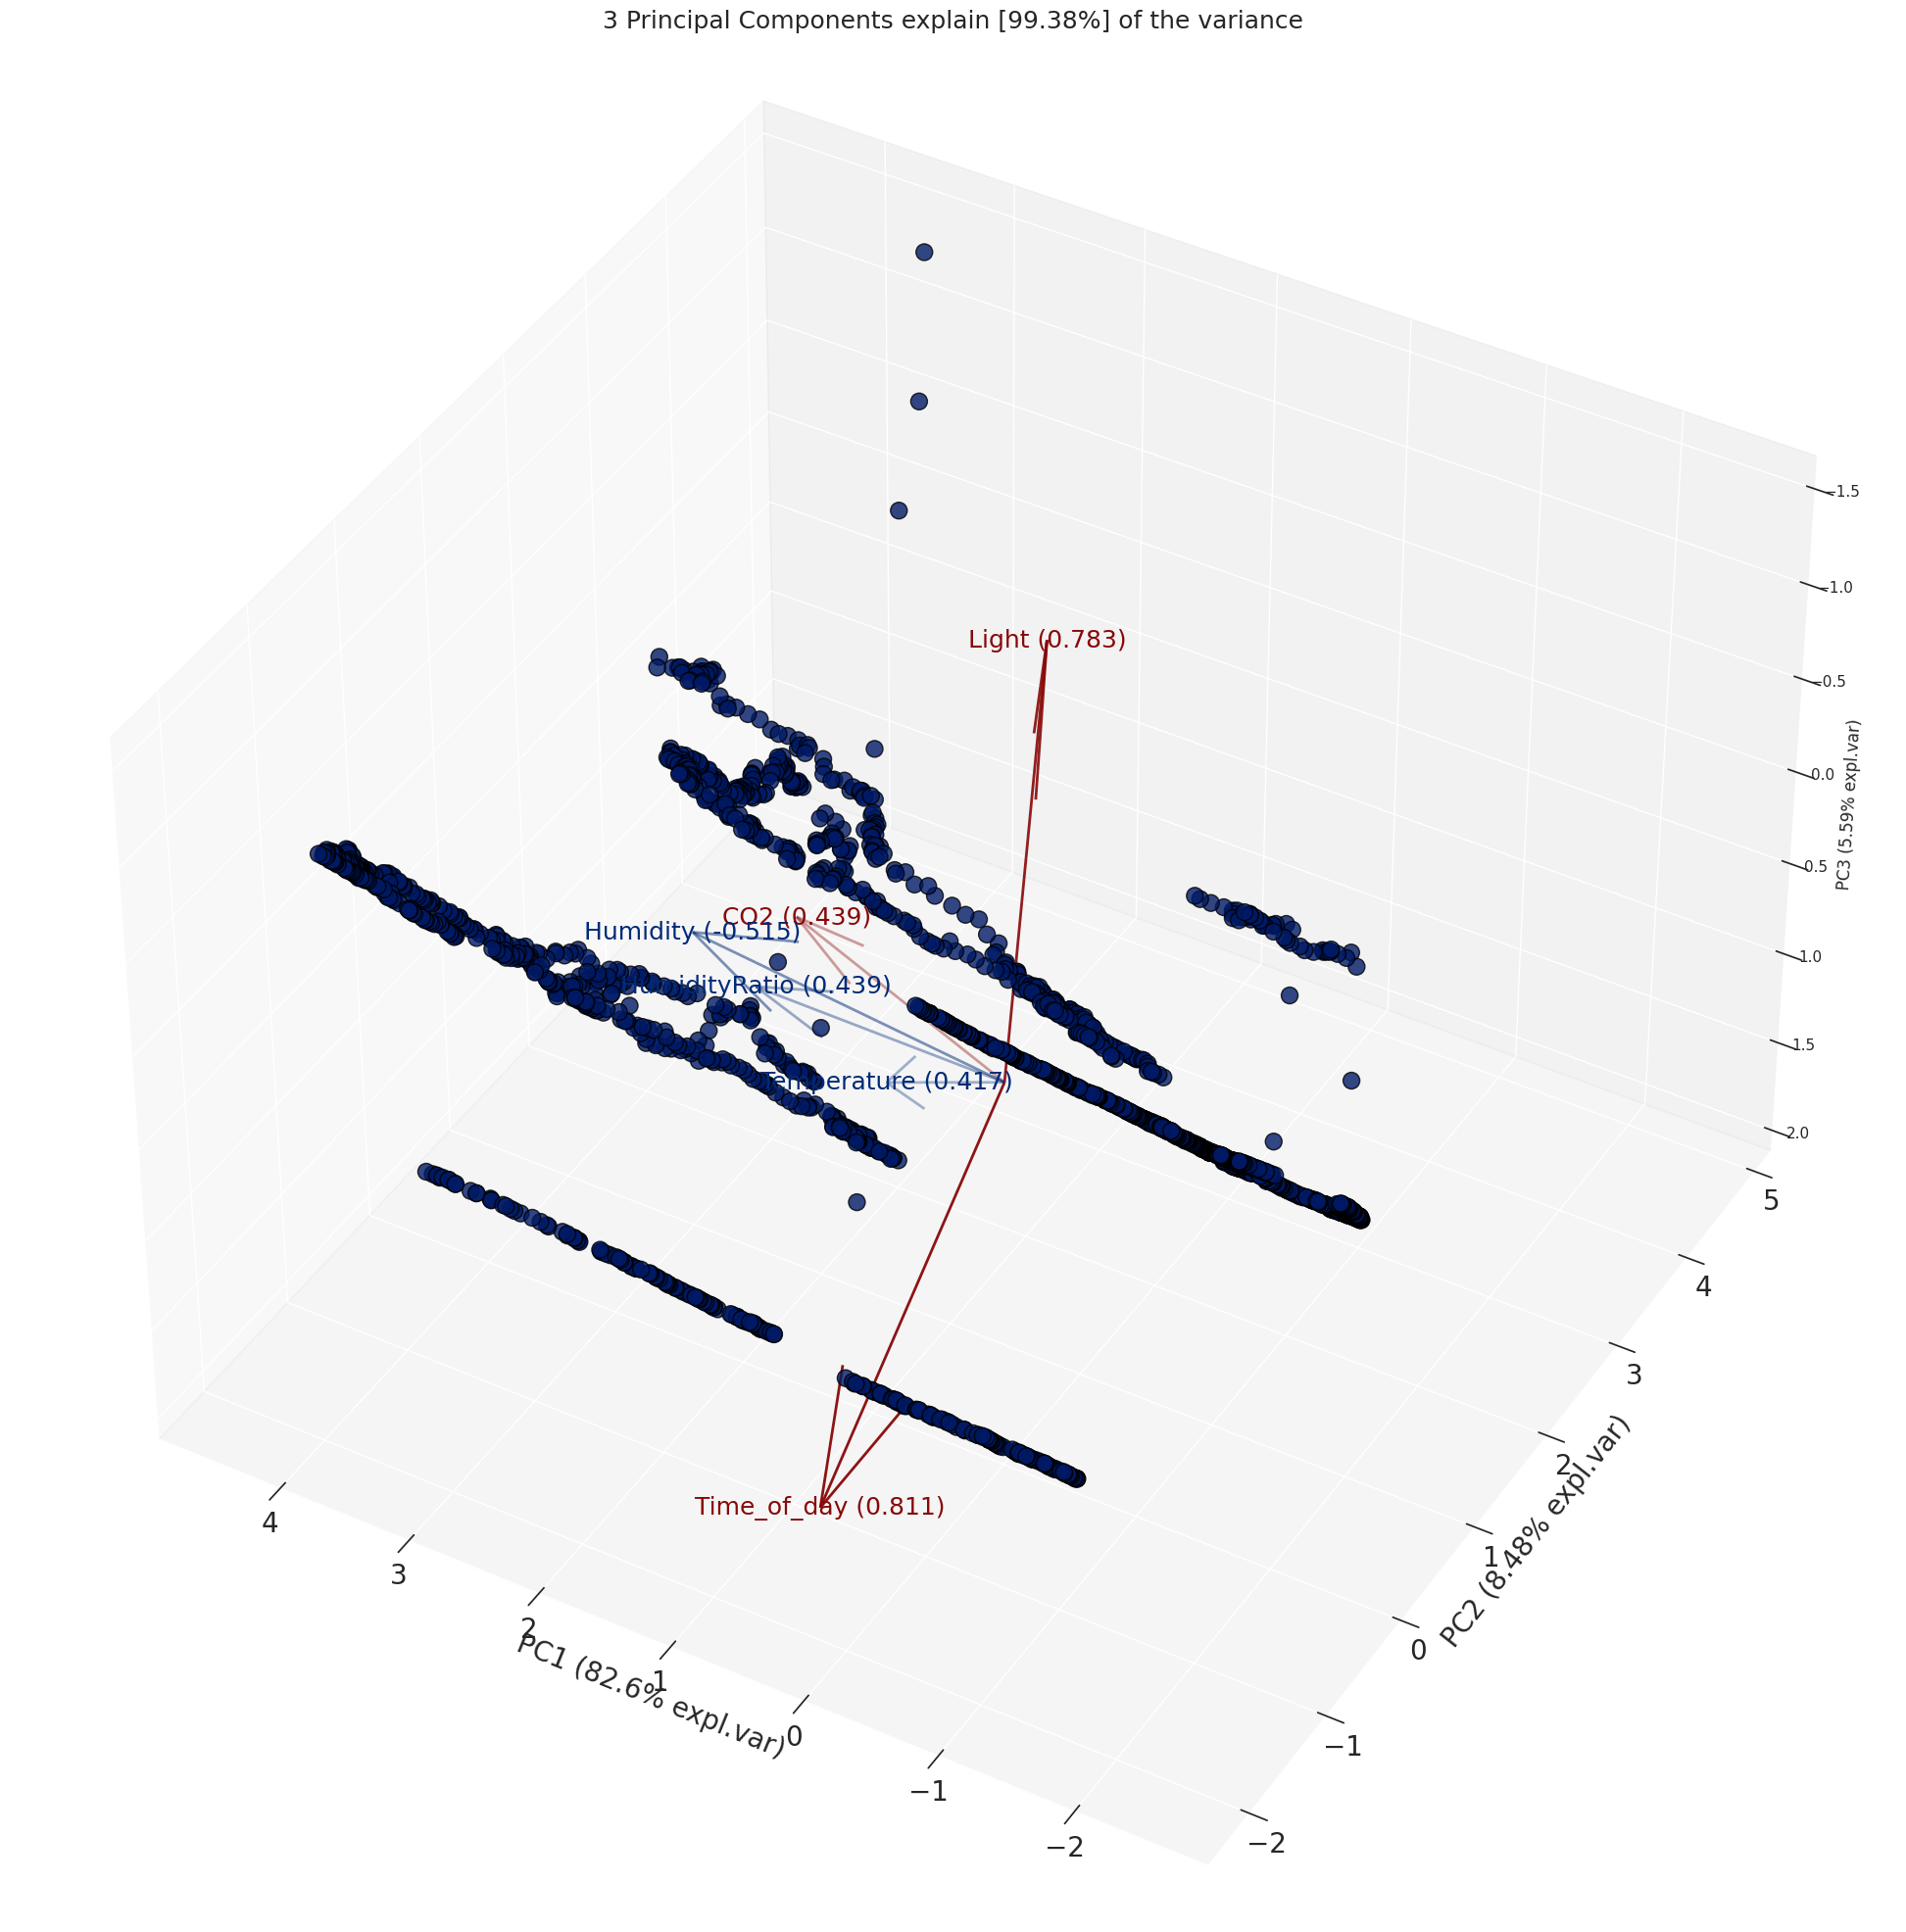

In [35]:
model.biplot3d(legend=False)

# Classification using Pycaret
After initially dividing the dataset into training and testing sets at a 70% to 30% ratio, the PyCaret `compare_models()` function was utilized to identify models with the top accuracy on the dataset. The outcomes highlighted that, without PCA, the top-performing models were Linear Discriminant Analysis, Extra Trees Classifier, and Gradient Boosting Classifier. However, upon integrating PCA, the performance of these models declined. Instead, Logistic Regression, K-nearest Neighbour, and Quadratic Discriminant Analysis emerged as the superior choices. Consequently, I opted for Logistic Regression, K-nearest Neighbour, and Quadratic Discriminant Analysis, evaluating their efficacy both pre- and post-PCA application on the original dataset.

In [36]:
!pip install pycaret


In [37]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [39]:
dr = df.drop(columns=['Occupancy'])
data = dr.sample(frac=0.9, random_state=786)
data_unseen = dr.drop(data.index)


data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2398, 6)
Unseen Data For Predictions: (267, 6)


In [40]:
from pycaret.classification import *
clf = setup(data=df, target='Occupancy', train_size=0.6, session_id=123)

**Comparing All Models**

In [41]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

####Best model

In [42]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

 Create a Model

**ET Classifier**

In [43]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [44]:
tuned_et=tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate ET**


In [46]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Random forest classifier**

In [47]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [48]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate model**

In [50]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Light Gradient Boosting Machine**

In [51]:
lightgbm=create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune lightgbm Model**

In [52]:
tuned_lightgbm=tune_model(lightgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate lightgbm Model**

In [53]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [54]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
!pip install statsmodels --upgrade

# **Classification and PCA**

In [56]:
clf_pca = setup(data=df, target='Occupancy', train_size=0.6, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

###show the best model and pca

In [57]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [58]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

# **Tuning the Best Model**

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [60]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [62]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluating Models**

In [63]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [64]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-NN**

In [65]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [66]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [68]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Random forest Classifier**

In [69]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [70]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [71]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [72]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. I chose the ET model "Extra trees classifier" for the AI Shapley analysis.

In [73]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [76]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
!pip install pycaret[analysis]


In [78]:
!pip install shap

In [79]:
!pip install shap --no-cache-dir

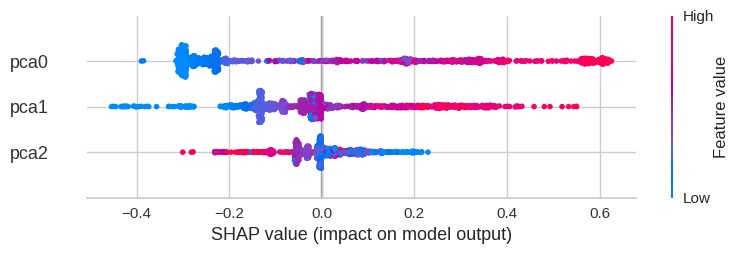

In [80]:
interpret_model(tuned_et_pca, plot='summary')

In [81]:
interpret_model(tuned_et_pca, plot='reason', observation=1)

In [82]:
interpret_model(tuned_et_pca, plot='reason')